# MTH3302 - Méthodes probabilistes et statistiques pour I.A.
#### Polytechnique Montréal


### Projet A2024

-----

# Prédiction de la consommation en carburant de voitures récentes.

### Contexte

## TODO

### Objectif

Nous nous concentrons ici uniquement sur les mâles adultes récoltés dans chaque zone de chasse. L'objectif est de prédire, pour différentes zone de chasses, **le nombre de mâles récoltés pour l'année 2021**.

### Données
Les données utilisées pour inférer la consommation de carburant sont les suivantes :

## TODO


In [63]:
using CSV 
using DataFrames
using Distributions
using Gadfly
using LinearAlgebra
import Random
using Statistics
#import StatsBase

In [90]:
full_train = CSV.read("../data/raw/train.csv", DataFrame)
test =  CSV.read("../data/raw/test.csv", DataFrame) #ne contient pas la varialbe consommation

ntrain = round(Int, .8*nrow(full_train)) #80% des données pour l'entrainement: 80% * nb de lignes

train_id = sample(1:nrow(data), ntrain, replace=false, ordered=true) #échantillonnage aléatoire pour l'entrainement
valid_id = setdiff(1:nrow(data), train_id) #échantillon de validation. prend celles qui ne sont pas dans l'échantillon d'entrainement

train = data[train_id, :]  
valid = data[valid_id, :]

first(train, 5)



Row,annee,type,nombre_cylindres,cylindree,transmission,boite,consommation
,Int64,String31,Int64,String3,String15,String15,String31
1,2021,voiture_compacte,6,"3,3",propulsion,automatique,"11,7605"
2,2023,voiture_deux_places,8,5,integrale,automatique,"13,0672222222222"
3,2022,voiture_moyenne,8,"4,4",integrale,automatique,"13,8358823529412"
4,2022,voiture_moyenne,8,"4,4",integrale,automatique,"13,8358823529412"
5,2022,voiture_minicompacte,3,"1,5",traction,automatique,"7,3503125"


### 1. Vérification des données 

7×7 DataFrame
 Row │ variable          mean     min          median  max                    nmissing  eltype   
     │ Symbol            Union…   Any          Union…  Any                    Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ annee             2019.16  2014         2019.0  2024                          0  Int64
   2 │ type                       VUS_petit            voiture_sous_compacte         0  String31
   3 │ nombre_cylindres  5.23659  3            4.0     12                            0  Int64
   4 │ cylindree                                                                   317  Missing
   5 │ transmission               4x4                  traction                      0  String15
   6 │ boite                      automatique          manuelle                      0  String15
   7 │ consommation                                                                317  Missing


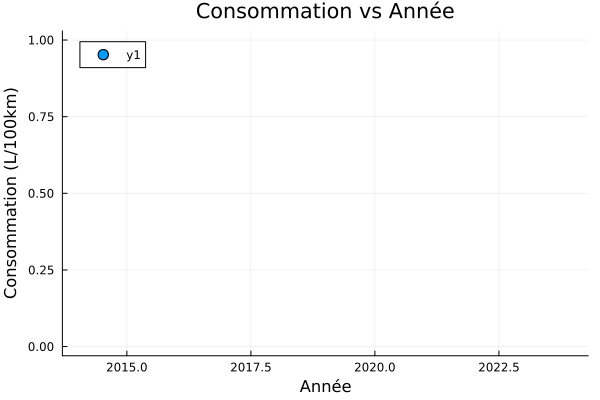

In [89]:
# Résumé des données
println(describe(train))

# Visualisation de la consommation en fonction de l'année
scatter(train.annee, train.consommation, title="Consommation vs Année", xlabel="Année", ylabel="Consommation (L/100km)")


# 2. Prétraitement des données

In [91]:
function safe_parse_float(x)
    try
        return parse(Float64, x)
    catch
        return missing
    end
end

safe_parse_float (generic function with 1 method)

In [92]:
function safe_parse_int(x)
    try
        return parse(Int64, x)
    catch
        return missing
    end
end

safe_parse_int (generic function with 1 method)

In [88]:
# Convertir les colonnes en types numériques
for col in [:cylindree]
    train[!, col] = safe_parse_float.(train[!, col])
    valid[!, col] = safe_parse_float.(valid[!, col])
end

for col in [:consommation]
    train[!, col] = safe_parse_float.(train[!, col])
    valid[!, col] = safe_parse_float.(valid[!, col])
end

In [87]:
# Résumé des données
println(describe(train))

7×7 DataFrame
 Row │ variable          mean     min          median  max                    nmissing  eltype   
     │ Symbol            Union…   Any          Union…  Any                    Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ annee             2019.16  2014         2019.0  2024                          0  Int64
   2 │ type                       VUS_petit            voiture_sous_compacte         0  String31
   3 │ nombre_cylindres  5.23659  3            4.0     12                            0  Int64
   4 │ cylindree                                                                   317  Missing
   5 │ transmission               4x4                  traction                      0  String15
   6 │ boite                      automatique          manuelle                      0  String15
   7 │ consommation                                                                317  Missing


In [ ]:
for col in names(train)
    num_missing = count(ismissing, train[:, col])
    println("La colonne $(col) a $(num_missing) valeurs manquantes.")
end

La colonne annee a 0 valeurs manquantes.
La colonne type a 0 valeurs manquantes.
La colonne nombre_cylindres a 0 valeurs manquantes.
La colonne cylindree a 166 valeurs manquantes.
La colonne transmission a 0 valeurs manquantes.
La colonne boite a 0 valeurs manquantes.
La colonne consommation a 0 valeurs manquantes.


In [ ]:
#dropmissing pour supprimer les lignes avec des valeurs manquantes


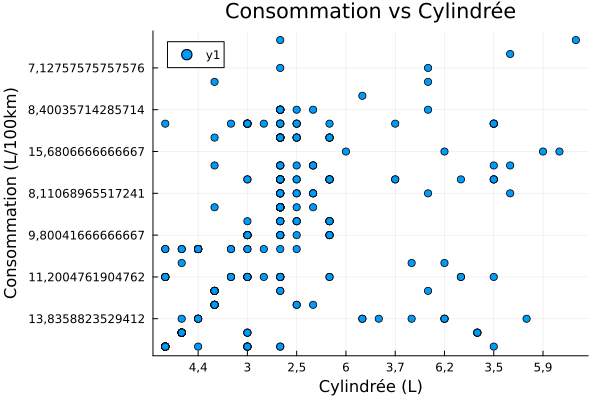

In [ ]:
scatter(train.cylindree, train.consommation, xlabel="Cylindrée (L)", ylabel="Consommation (L/100km)", title="Consommation vs Cylindrée")

In [67]:
data = deepcopy(train)
data = dropmissing(data)

numeric_cols = [:annee, :nombre_cylindres, :cylindree, :consommation]
M = cor(Matrix(data[:, numeric_cols]))

MethodError: MethodError: no method matching +(::String3, ::String3)
String concatenation is performed with * (See also: https://docs.julialang.org/en/v1/manual/strings/#man-concatenation).

Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
   @ Base operators.jl:587
  +(!Matched::ChainRulesCore.ZeroTangent, ::Any)
   @ ChainRulesCore C:\Users\mcola\.julia\packages\ChainRulesCore\I1EbV\src\tangent_arithmetic.jl:99
  +(::Any, !Matched::ChainRulesCore.NotImplemented)
   @ ChainRulesCore C:\Users\mcola\.julia\packages\ChainRulesCore\I1EbV\src\tangent_arithmetic.jl:25
  ...
